<a href="https://colab.research.google.com/github/dhan-t/CCDATSCL_EXERCISES_COM222-ML/blob/main/Exercise%201/Exercise%201%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

In this activity, you will work with the New York City Airbnb Open Data—a popular, messy, and highly realistic dataset used by data analysts and data scientists around the world. The dataset includes thousands of Airbnb listings along with details about hosts, locations, prices, reviews, and more.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR8Pmq3Gv7y7z_2Xun-OqMIk43kd5u0TXEatw&s"/>


To guide your work, you will follow the 6-Step Data Wrangling Process, a professional workflow used in industry:

- Discovering. Become familiar with the data by exploring its structure and observing patterns.

- Structuring. Fix issues related to format, column types, indices, and duplicated records.

- Cleaning. Handle missing values, outliers, and inconsistencies so the dataset becomes trustworthy.

- Enriching. Add new features, aggregate information, and enhance the dataset for deeper insights.

- Validating. Apply rule-based checks to ensure the data meets quality standards.

- Publishing. Export and prepare the cleaned dataset for downstream analysis or reporting.
Throughout this exercise, you will answer questions and fill in code cells based on these six steps. You will mimic what professional data scientists do when preparing data for business intelligence dashboards, machine learning models, or exploratory analysis.

In [ ]:
import kagglehub
import os
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'new-york-city-airbnb-open-data' dataset.
Path to dataset files: /kaggle/input/new-york-city-airbnb-open-data
True


## A. Discovering


Display the first 10 rows

In [ ]:
# put your answer here
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


Display the column names:

In [ ]:
# put your answer here
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Display the dataframe shape:

In [ ]:
# put your answer here
df.shape

(48895, 16)

Identify the numerical features:

In [ ]:
# put your answer here
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Identify the categorical features

In [ ]:
# put your answer here
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


What are the top 5 questions this dataset might help answer?

In [ ]:
Which AirBnB room types are the most rented?
What neighbourhood has the highest concentraition of AirBnBs available?
What neighbourhood can benefit from new units for AirBnB?
Which neighbourhood has the most renters?
Does price matter for renters?

Object `rented` not found.
Object `available` not found.
Object `AirBnB` not found.
Object `renters` not found.
Object `renters` not found.


## B. Structuring

Check if the dataset has proper column types

In [ ]:
# put your answer here
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


Check if the dataset has index issues

In [ ]:
# put your answer here
df.index

RangeIndex(start=0, stop=48895, step=1)

Check if the dataset has duplicated rows

In [ ]:
# put your answer here
df.duplicated().sum()

np.int64(0)

Convert columns to correct types (e.g., dates → datetime).

In [ ]:
# put your answer here
df['last_review'] = pd.to_datetime(df['last_review'])
df.last_review.dtype

dtype('<M8[ns]')

Identify at least one structural issue and describe how to fix it.

In [ ]:
# put your answer here
# Date was not using datetime type -> Convert the colum to datetime.

## C. Cleaning



Check for missing values

In [ ]:
# put your answer here
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


Check for outliers in `minimum_nights`

In [ ]:
# put your answer here
df.minimum_nights.describe()

,minimum_nights
count,48895.000000
mean,7.029962
std,20.510550
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,1250.000000


Check for invalid values (e.g., price ≤ 0)

In [ ]:
# put your answer here
df.price.describe()

,price
count,48895.000000
mean,152.720687
std,240.154170
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


Apply a missing-value strategy (drop, fill, or flag)


In [ ]:
# put your answer here
df['has_review'] = df['last_review'].isnull().astype(int)

# Fix FutureWarning: Use direct assignment instead of inplace=True for fillna
df['name'] = df['name'].fillna('[MISSING LISTING NAME]')
df['host_name'] = df['host_name'].fillna('Unknown Host')

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,has_review
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0


In [ ]:
def impute_missing_review_data(df):
    PLACEHOLDER_DATE = pd.to_datetime('1900-01-01')

    impute_condition = (df['number_of_reviews'] == 0)

    df.loc[impute_condition, 'last_review'] = PLACEHOLDER_DATE

    df.loc[impute_condition, 'reviews_per_month'] = 0.0

    print("Missing review values imputed successfully based on 'number_of_reviews' == 0.")
    return df

In [ ]:
df_inputed = df.copy()
df_inputed = impute_missing_review_data(df_inputed)
df_inputed

Missing review values imputed successfully based on 'number_of_reviews' == 0.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,has_review
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1900-01-01,0.00,1,365,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,1900-01-01,0.00,2,9,1
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,1900-01-01,0.00,2,36,1
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1900-01-01,0.00,1,27,1
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,1900-01-01,0.00,6,2,1


In [ ]:
df_inputed.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


Apply an outlier-handling strategy

In [ ]:
# put your answer here
df_inputed = df_inputed[df_inputed['price'] > 0]
df_inputed.price.describe()

,price
count,48884.000000
mean,152.755053
std,240.170260
min,10.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


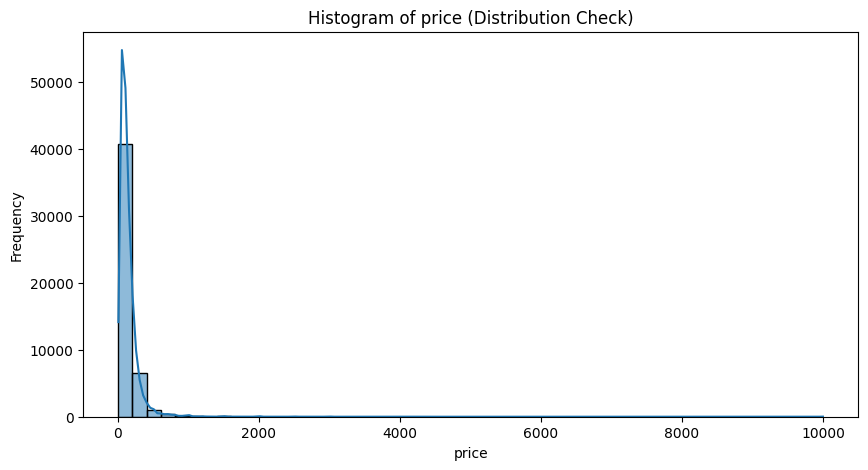

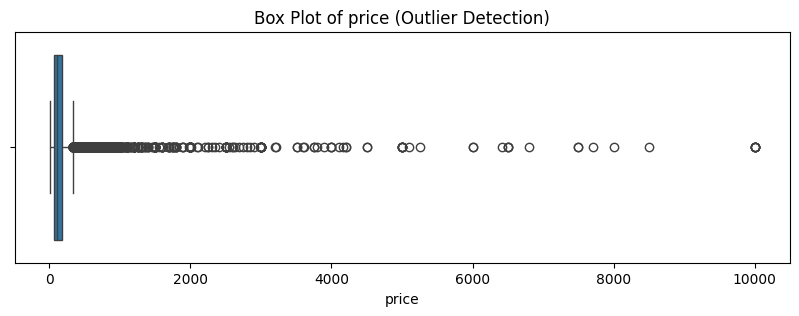

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

COLUMN_NAME = 'price'

# --- 1. Histogram (To check distribution and long tails) ---
plt.figure(figsize=(10, 5))
sns.histplot(df_inputed[COLUMN_NAME], kde=True, bins=50)
plt.title(f'Histogram of {COLUMN_NAME} (Distribution Check)')
plt.xlabel(COLUMN_NAME)
plt.ylabel('Frequency')
plt.show()

# --- 2. Box Plot (The best visual for outliers) ---
# Outliers will be displayed as individual points outside the whiskers.
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_inputed[COLUMN_NAME])
plt.title(f'Box Plot of {COLUMN_NAME} (Outlier Detection)')
plt.xlabel(COLUMN_NAME)
plt.show()

--- Fences for Capping on 'price' ---
Lower Fence (capping min): 1.00
Upper Fence (capping max): 334.00

Created new column 'price_capped' with outliers capped.
Created final feature 'price_log' using log(1 + capped price).


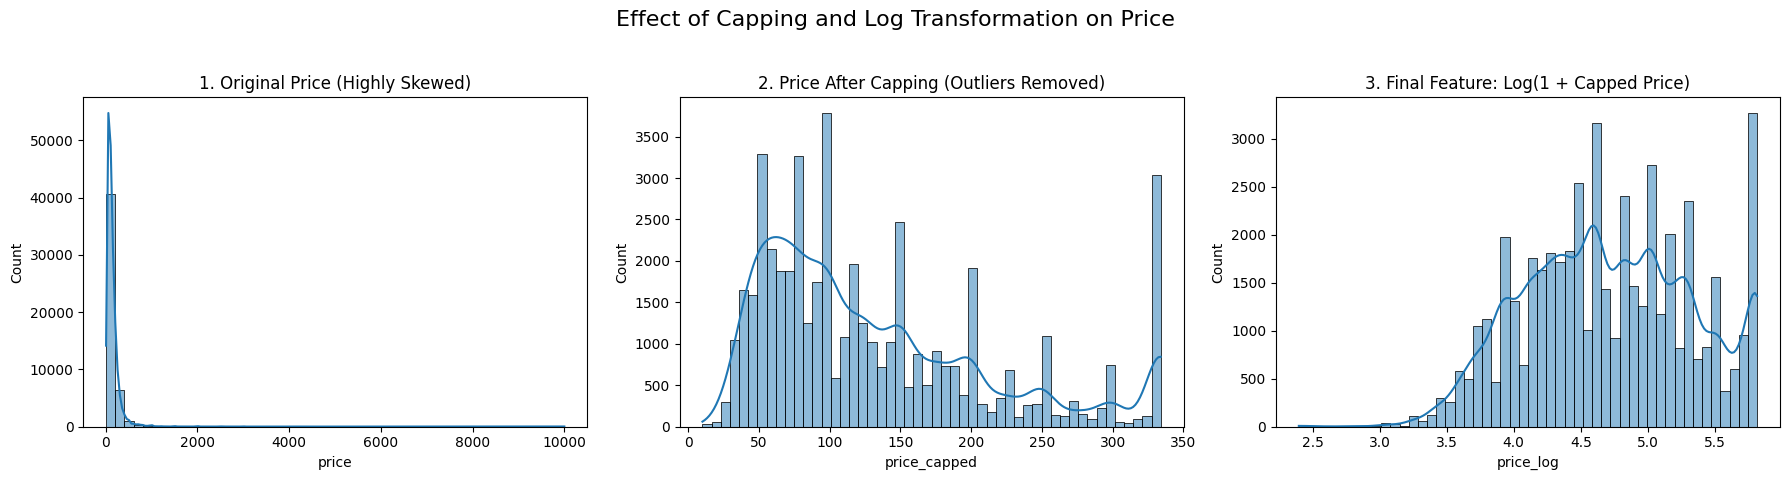


DataFrame Head with New Features:
   price  price_capped  price_log
0    149         149.0   5.010635
1    225         225.0   5.420535
2    150         150.0   5.017280
3     89          89.0   4.499810
4     80          80.0   4.394449


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def cap_and_log_transform(df, column, multiplier=1.5):
    """
    Applies Capping (Winsorizing) based on the IQR rule, and then applies a
    Log Transformation to reduce skewness and the influence of extreme values.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column (str): The name of the column to transform (e.g., 'price').
        multiplier (float): The IQR multiplier for defining the fences (1.5 standard).

    Returns:
        pd.DataFrame: The DataFrame with the new, transformed column added.
    """

    # 1. Calculate IQR Fences
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - (multiplier * IQR)
    upper_fence = Q3 + (multiplier * IQR)

    # Ensure prices are non-negative for log transformation
    # We use 1 here to ensure log1p doesn't encounter log(0) if the value is capped down to 0
    lower_fence = max(1, lower_fence)

    print(f"--- Fences for Capping on '{column}' ---")
    print(f"Lower Fence (capping min): {lower_fence:,.2f}")
    print(f"Upper Fence (capping max): {upper_fence:,.2f}")

    # 2. Apply Capping (Winsorizing)
    # Replace values below the lower fence with the lower fence
    # Replace values above the upper fence with the upper fence
    capped_col_name = f'{column}_capped'

    # We operate directly on the passed DataFrame 'df' which is intended to be the imputed one
    df[capped_col_name] = np.where(df[column] < lower_fence, lower_fence,
                                   np.where(df[column] > upper_fence, upper_fence, df[column]))

    print(f"\nCreated new column '{capped_col_name}' with outliers capped.")

    # 3. Apply Log Transformation
    # Create the final feature for the model, ensuring we use log(1 + x) to handle near-zero values
    log_col_name = f'{column}_log'
    df[log_col_name] = np.log1p(df[capped_col_name])

    print(f"Created final feature '{log_col_name}' using log(1 + capped price).")

    return df

# --- Apply to df_inputed (the actual data after initial cleaning) ---
# Fix SettingWithCopyWarning: Use .loc for explicit assignment to avoid modifying a slice
df_inputed.loc[:, 'price'] = df_inputed['price'].apply(lambda x: max(1, x))

# Apply the capping and log transformation to df_inputed
df_inputed = cap_and_log_transform(df_inputed.copy(), column='price', multiplier=1.5)

# --- Visualization of Results ---
# Setup for side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Effect of Capping and Log Transformation on Price', fontsize=16)

# Plot 1: Original Price Histogram
sns.histplot(df_inputed['price'], ax=axes[0], kde=True, bins=50)
axes[0].set_title('1. Original Price (Highly Skewed)')

# Plot 2: Capped Price Histogram
sns.histplot(df_inputed['price_capped'], ax=axes[1], kde=True, bins=50)
axes[1].set_title('2. Price After Capping (Outliers Removed)')

# Plot 3: Log-Transformed Price Histogram
sns.histplot(df_inputed['price_log'], ax=axes[2], kde=True, bins=50)
axes[2].set_title('3. Final Feature: Log(1 + Capped Price)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Display the head of the DataFrame to show the new columns
print("\nDataFrame Head with New Features:")
print(df_inputed[['price', 'price_capped', 'price_log']].head())

## D. Enriching

Create at least 3 new variables:
- price_per_minimum_night
- review_rate_per_month (combine ratings + frequency)
- is_expensive (boolean flag based on price threshold)


In [ ]:
import pandas as pd
import numpy as np

def create_engineered_features(df_inputed):
    """
    Creates three new engineered features for the Airbnb dataset.
    The 'review_rate_per_month' feature is simplified to use only 'reviews_per_month'
    since a specific 'review_scores_rating' column is not present.

    Args:
        df_inputed (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: The DataFrame with the three new features added.
    """

    # --- 1. Price Per Minimum Night (Economic Efficiency) ---
    df_inputed['price_per_minimum_night'] = np.where(
        df_inputed['minimum_nights'] > 0,
        df_inputed['price'] / df_inputed['minimum_nights'],
        0
    )
    print("Created 'price_per_minimum_night'.")

    # --- 2. Review Rate Per Month (Based on available frequency) ---
    # Since 'review_scores_rating' is not in the column list,
    # we cannot combine frequency with quality. We will use frequency directly.

    # We create a new column name for future clarity, even if it holds the same data for now
    df_inputed['review_rate_per_month'] = df_inputed['reviews_per_month']
    print("Created 'review_rate_per_month' (using only frequency as rating column is absent).")

    # --- 3. Is Expensive (Boolean Flag) ---
    price_threshold = df_inputed['price'].quantile(0.75)

    df_inputed['is_expensive'] = (df_inputed['price'] > price_threshold).astype(int)

    print(f"Created 'is_expensive' flag (1 if price > {price_threshold:,.2f}).")

    return df_inputed

In [ ]:
df_inputed.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,has_review,price_capped,price_log,price_per_minimum_night,review_rate_per_month,is_expensive
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,2018-10-19,0.21,6,365,0,149.0,5.010635,149.0,0.21,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,2019-05-21,0.38,2,355,0,225.0,5.420535,225.0,0.38,1
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,1900-01-01,0.00,1,365,1,150.0,5.017280,50.0,0.00,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,2019-07-05,4.64,1,194,0,89.0,4.499810,89.0,4.64,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,2018-11-19,0.10,1,0,0,80.0,4.394449,8.0,0.10,0


Create 1 aggregated summary table

(e.g. average price per neighborhood number of hosts per borough)

In [ ]:
import pandas as pd

# 1. Average Price per Neighbourhood Group
avg_price_by_borough = df_inputed.groupby('neighbourhood_group')['price'].mean().reset_index()
avg_price_by_borough.rename(columns={'price': 'Avg_Price'}, inplace=True)
print("--- 1. Average Price per Borough ---")
print(avg_price_by_borough)
print("-" * 40)

# 2. Number of Unique Hosts per Neighbourhood Group
unique_hosts_by_borough = df_inputed.groupby('neighbourhood_group')['host_id'].nunique().reset_index()
unique_hosts_by_borough.rename(columns={'host_id': 'Unique_Host_Count'}, inplace=True)
print("--- 2. Number of Unique Hosts per Borough ---")
print(unique_hosts_by_borough)
print("-" * 40)

# 3. Multi-Metric Aggregation by Room Type (e.g., Avg Price, Median Price, Total Listings)
multi_agg_table = df_inputed.groupby('room_type').agg(
    Avg_Price=('price', 'mean'),
    Median_Price=('price', 'median'),
    Total_Listings=('id', 'count')
).reset_index()
print("--- 3. Multi-Metric Aggregation by Room Type ---")
print(multi_agg_table)
print("-" * 40)

--- 1. Average Price per Borough ---
  neighbourhood_group   Avg_Price
0               Bronx   87.577064
1            Brooklyn  124.438915
2           Manhattan  196.884903
3              Queens   99.517649
4       Staten Island  114.812332
----------------------------------------
--- 2. Number of Unique Hosts per Borough ---
  neighbourhood_group  Unique_Host_Count
0               Bronx                789
1            Brooklyn              15965
2           Manhattan              16577
3              Queens               3983
4       Staten Island                256
----------------------------------------
--- 3. Multi-Metric Aggregation by Room Type ---
         room_type   Avg_Price  Median_Price  Total_Listings
0  Entire home/apt  211.810918         160.0           25407
1     Private room   89.809131          70.0           22319
2      Shared room   70.248705          45.0            1158
----------------------------------------


## E. Validating

Create at least 3 validation checks
- Price must be positive.
- Host ID should not be null.
- Minimum nights must be ≥ 1.
- Generate a validation report:
- Count of rows violating each rule.

Decide if invalid rows (if any) should be removed or corrected?

In [ ]:
import pandas as pd
import numpy as np

def run_validation_and_report_inputed(df_inputed):
    """
    Runs specified validation checks on the df_inputed DataFrame and generates a report
    of rows violating each rule. The function does NOT modify the DataFrame itself
    but works on a copy to count violations.

    Args:
        df_inputed (pd.DataFrame): The input DataFrame.

    Returns:
        tuple: (df_inputed, report_df) - The original DataFrame and the validation report.
    """

    # We use a copy of the input DataFrame for counting violations
    df_processed = df_inputed.copy()

    # Initialize dictionary to store violation counts
    violation_counts = {}
    original_row_count = len(df_processed)

    # ----------------------------------------------------------------------
    # 1. Validation Checks (Define the Rules)
    # ----------------------------------------------------------------------

    # Rule A: Price must be strictly positive (greater than 0)
    rule_a_mask = df_processed['price'] <= 0
    violation_counts['Price_Non_Positive'] = rule_a_mask.sum()

    # Rule B: Host ID should not be null (Ensures host exists)
    rule_b_mask = df_processed['host_id'].isnull()
    violation_counts['HostID_is_Null'] = rule_b_mask.sum()

    # Rule C: Minimum nights must be >= 1
    rule_c_mask = df_processed['minimum_nights'] < 1
    violation_counts['MinNights_LessThan_One'] = rule_c_mask.sum()

    # Optional Rule D: Check for impossible review dates (future dates)
    # Check only if 'last_review' is a datetime column
    rule_d_mask = pd.Series(False, index=df_processed.index)
    if 'last_review' in df_processed.columns and pd.api.types.is_datetime64_any_dtype(df_processed['last_review']):
        # Check for dates past a reasonable future point (e.g., end of 2025)
        rule_d_mask = df_processed['last_review'] > pd.to_datetime('2025-12-31')
        violation_counts['LastReview_In_Future'] = rule_d_mask.sum()
    else:
        violation_counts['LastReview_In_Future'] = 0


    # ----------------------------------------------------------------------
    # 2. Generate Validation Report
    # ----------------------------------------------------------------------

    report_df = pd.DataFrame(violation_counts.items(), columns=['Validation_Rule', 'Violations_Count'])
    report_df['Total_Rows'] = original_row_count
    report_df['Violation_Rate'] = (report_df['Violations_Count'] / original_row_count) * 100

    print("--- Data Validation Report ---")
    print(report_df.sort_values(by='Violations_Count', ascending=False))
    print("-" * 40)

    return df_inputed, report_df

In [ ]:
df_inputed.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,has_review,price_capped,price_log,price_per_minimum_night,review_rate_per_month,is_expensive
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,2018-10-19,0.21,6,365,0,149.0,5.010635,149.0,0.21,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,2019-05-21,0.38,2,355,0,225.0,5.420535,225.0,0.38,1
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,1900-01-01,0.00,1,365,1,150.0,5.017280,50.0,0.00,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,2019-07-05,4.64,1,194,0,89.0,4.499810,89.0,4.64,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,2018-11-19,0.10,1,0,0,80.0,4.394449,8.0,0.10,0


In [ ]:
# IMPORTANT: Before running this, ensure 'df_inputed' is the variable name
# of your cleaned/imputed/engineered dataset.

# 1. Ensure the 'last_review' column is a datetime object, as the validation check depends on it.
# This should have been done in an earlier step, but is critical here.
if 'last_review' in df_inputed.columns:
    df_inputed['last_review'] = pd.to_datetime(df_inputed['last_review'], errors='coerce')

# 2. Execute the validation function
# df_inputed remains the input DataFrame (as the function doesn't modify it permanently)
# validation_report holds the summary table.
df_inputed, validation_report = run_validation_and_report_inputed(df_inputed)

# 3. Display the full report DataFrame
validation_report

--- Data Validation Report ---
          Validation_Rule  Violations_Count  Total_Rows  Violation_Rate
0      Price_Non_Positive                 0       48884             0.0
1          HostID_is_Null                 0       48884             0.0
2  MinNights_LessThan_One                 0       48884             0.0
3    LastReview_In_Future                 0       48884             0.0
----------------------------------------


,Validation_Rule,Violations_Count,Total_Rows,Violation_Rate
0,Price_Non_Positive,0,48884,0.0
1,HostID_is_Null,0,48884,0.0
2,MinNights_LessThan_One,0,48884,0.0
3,LastReview_In_Future,0,48884,0.0


In [ ]:
df_inputed.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


## F. Publishing

Select final columns for publication.



In [ ]:
# List all columns that are either redundant, raw, or identifiers
columns_to_drop_from_X = [
    'id',
    'host_id',
    'name',
    'host_name',
    'last_review',
    'price_capped',
]

# Separate features (X) and the target variable (y)
# Example: Predicting the log-transformed price
X = df_inputed.drop(columns=columns_to_drop_from_X + ['price_log'], axis=1)
y = df_inputed['price_log']

print("Features (X) ready for scaling and encoding:")
print(X.columns.tolist())

Features (X) ready for scaling and encoding:
['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'has_review', 'price_per_minimum_night', 'review_rate_per_month', 'is_expensive']


In [ ]:
# put your answer here
df_inputed.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,has_review,price_capped,price_log,price_per_minimum_night,review_rate_per_month,is_expensive
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,2018-10-19,0.21,6,365,0,149.0,5.010635,149.0,0.21,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,2019-05-21,0.38,2,355,0,225.0,5.420535,225.0,0.38,1
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,1900-01-01,0.00,1,365,1,150.0,5.017280,50.0,0.00,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,2019-07-05,4.64,1,194,0,89.0,4.499810,89.0,4.64,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,2018-11-19,0.10,1,0,0,80.0,4.394449,8.0,0.10,0


Export cleaned dataset as "cleaned_airbnb.csv"

In [ ]:
# put your answer here
df_inputed.to_csv('cleaned_airbnb.csv', index=False)

Export summary reports (e.g., validation or aggregations) as CSV.

In [ ]:
# Export the final validation report
validation_report_final.to_csv('validation_report.csv', index=False)
print("Validation report exported to 'validation_report.csv'")

# Export the average price by borough aggregation
avg_price_by_borough.to_csv('avg_price_by_borough.csv', index=False)
print("Average price by borough report exported to 'avg_price_by_borough.csv'")

# Export the unique hosts by borough aggregation
unique_hosts_by_borough.to_csv('unique_hosts_by_borough.csv', index=False)
print("Unique hosts by borough report exported to 'unique_hosts_by_borough.csv'")

# Export the multi-metric aggregation by room type
multi_agg_table.to_csv('room_type_aggregations.csv', index=False)
print("Room type aggregations report exported to 'room_type_aggregations.csv'")

Validation report exported to 'validation_report.csv'
Average price by borough report exported to 'avg_price_by_borough.csv'
Unique hosts by borough report exported to 'unique_hosts_by_borough.csv'
Room type aggregations report exported to 'room_type_aggregations.csv'
